## EN4 TEMP (vertical mean: 0-200m; 200-600m)

In [1]:
import os
import xarray as xr
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import cm,colors,gridspec,rc
USER = os.environ['USER']

## Bathymetry -- ETOPO1

In [2]:
path = f'/glade/work/{USER}/MAPP/ETOPO'
filename = f'{path}/Etopo1_Bed_0_65N_170E_40W.nc'
bathy = xr.open_dataset(filename)
lon_e = bathy['lon']
for ii in range(len(lon_e)):
    if lon_e[ii] > 0:
        lon_e[ii] = lon_e[ii] - 360.
lat_e = bathy['lat']
depth_e = bathy['depth']

In [3]:
mask_bathy = (depth_e >= 0.)*1.
mask_bathy = np.ma.array(mask_bathy, mask=mask_bathy == 0.)
lon_e, lat_e = np.meshgrid(lon_e, lat_e)
lon_e = np.ma.array(lon_e, mask=mask_bathy.mask)
lat_e = np.ma.array(lat_e, mask=mask_bathy.mask)

## LME shape

In [4]:
path = f'/glade/u/home/{USER}/O2prediction/Prediction/notebooks/data'
filename = '%s/LME_shapes.gmt' % path
file1 = open(filename,'r')
lines = file1.readlines()
#
nbox = -1
lonn = [[] for ii in range(194)]
latt = [[] for ii in range(194)]
ln = 9
for line in lines[ln:]:
    sl = line.split()
    if len(sl)==2 and sl[0] == '#':
        nbox = nbox + 1
    elif len(sl)==2 and sl[0] != '#':
        lonn[nbox-1].append(np.float(sl[0]))
        latt[nbox-1].append(np.float(sl[1]))
##
pp180 = []
for pp in range(len(lonn)):
    if len(lonn[pp])>0:
        if np.min(lonn[pp])>0:
            lon1 = np.array(lonn[pp]) - 360.
        else:
            lon1 = np.array(lonn[pp])
        if len(np.where(np.abs(lon1 + 180.)<1e-4)[0])>0:
            if len(lonn[pp])<4:
                pp180.append(pp)
##
lon0 = []
lat0 = []
nn = 0
for pp in range(len(lonn)):
    if len(lonn[pp])!=0:
        nn = nn + 1
        if np.min(lonn[pp])>0:
            lon1 = np.array(lonn[pp]) - 360.
        else:
            lon1 = np.array(lonn[pp])
        lat1 = np.array(latt[pp])
        lon1 = np.ma.array(lon1,mask=False)
        lat1 = np.ma.array(lat1,mask=False)
        if pp in pp180[1:]:
#        if len(np.where(np.abs(lon1+180.)<1e-4)[0]) > 0:
            #print(pp)
            aa = np.where(np.abs(lon1+180.)<1e-4)[0]
            lon1.mask[aa] = True
            lat1.mask[aa] = True
        lon0.append(lon1)
        lat0.append(lat1)

/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.l

In [5]:
lat_min = 15;   lat_max = 65
lon_min = -190; lon_max = -41.5
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
labb = ['a', 'b']
unit = ['$^\circ$C', '$^\circ$C']

In [6]:
#path = f'/glade/u/home/{USER}/O2prediction/Prediction/DATA'
#filename = f'{path}/GOBAI_O2_vertical_mean_2004-2016_monthly.nc'
path = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{path}/EN4_FOSI_T_vertical_mean_195401-201712_monthly.nc'
ds = xr.open_dataset(filename)
lon = ds.coords['lon'].values
lat = ds.coords['lat'].values
lon,lat = np.meshgrid(lon,lat)
lon = lon - 360.
layer1 = '0-200m'
layer2 = '200-600m'
var = 'EN4_T'

/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'lw'
/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-package

-1.0059751581262661 27.830981784396702


/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'lw'


1.0135853061660467 19.51456925877831


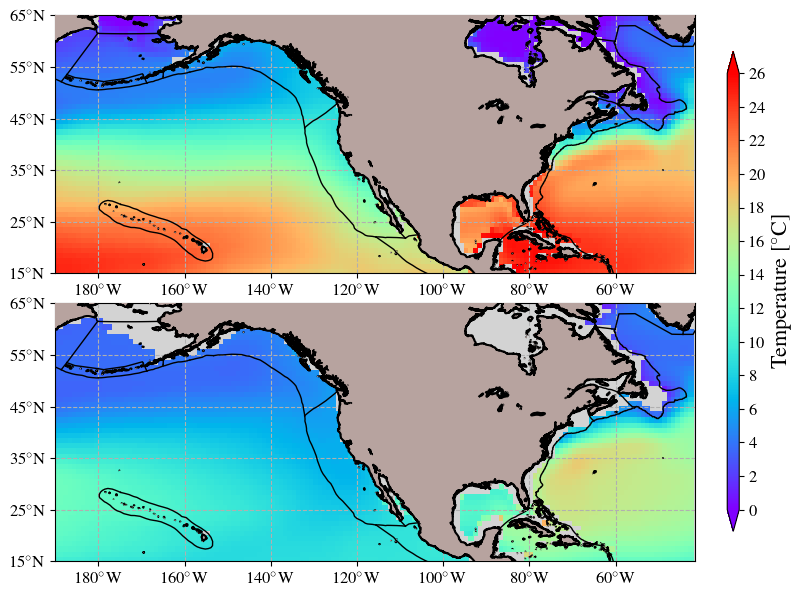

In [7]:
fig = plt.figure(figsize=[8, 6])
gs = gridspec.GridSpec(2, 1) #,width_ratios=[1,1,1,0.00001])
for vv, layer in [[0,layer1],[1, layer2]]:
    ax = fig.add_axes([0.06,0.05+(1-vv)*0.48,0.8,0.43])
    #ax = fig.add_subplot(gs[vv])
    Phi = ds[f'{var}_{layer}'][:144].mean(axis=0)
#    if layer == '200-600m':
#        Phi = o2_600m[:155].mean(axis=0)
#    elif layer == '0-200m':
#        Phi = o2_200m[:155].mean(axis=0)
    #
    xrr = np.arange(lon_min-10,lon_max+10)
    ax.fill_between(xrr,np.ones(len(xrr))*(lat_min-10),np.ones(len(xrr))*(lat_max+10),color='lightgray')
    for pp in range(len(lon0)):
        ax.plot(lon0[pp],lat0[pp],color='k',linewidth=1.,zorder=19)
    if var == 'EN4_T':
        dmin = 0; dmax = 26
    elif var == 'GOBAI_O2':
        dmin = 20; dmax = 320
    cd = ax.pcolor(lon,lat,Phi,cmap=cm.rainbow,vmin=dmin,vmax=dmax)
    #if vv == 0:
    #    ax.contour(lon,lat,Phi,[15],colors='orchid',linewidths=2.)
    #
    ax.pcolor(lon_e,lat_e,mask_bathy,shading='nearest',cmap=cm.terrain_r,vmin=.5,vmax=4,zorder=20)
    ax.contour(lon_e,lat_e,depth_e,[0],colors='k',lw=.15,zorder=21)
    ax.set_xlim(lon_min,lon_max)
    ax.set_ylim(lat_min,lat_max)
    ax.set_xticks(np.arange(-180, -40, 20))
    ax.set_yticks(np.arange(15, 66, 10))
    print(np.nanmin(Phi),np.nanmax(Phi))
    #
    xtl = []
    for ii in np.arange(-180, -40, 20):
        if ii < -180:
            ii = ii + 360
            ff = 'E'
        elif ii >= -180:
            ff = 'W'
        elif np.abs(ii-0)<1e-5:
            ff = ''
        xtl.append('%d$^\circ$%s' % (abs(ii),ff))
    ytl = []
    for jj in np.arange(15, 66, 10):
        if jj < 0:
            ff = 'S'
        elif jj > 0:
            ff = 'N'
        elif np.abs(jj-0)<1e-5:
            ff = ''
        ytl.append('%d$^\circ$%s' % (abs(jj),ff))
    #
    ax.set_xticklabels(xtl,fontsize=12,fontweight='bold',rotation=0)
    ax.set_yticklabels(ytl,fontsize=12,fontweight='bold',rotation=0)
    #
    ax.grid(linestyle='dashed',zorder=11)
    #ax.text(-140,62,var,fontsize=14,fontweight='bold')
# colorbar
cbaxes = fig.add_axes([0.90, 0.1, 0.015, 0.8])
cb = plt.colorbar(cd,orientation="vertical",extend='both',cax=cbaxes,ticks=np.arange(0,27,2))
cb.ax.tick_params(labelsize=12)
cb.set_label(label='Temperature [%s]'% (unit[vv]),fontsize=16,fontweight='bold')
#
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/{var}_{layer1}_{layer2}_vertical_mean_time_mean_195401-201712.png'
plt.savefig(outfile,dpi=400)
plt.show()

In [8]:
var = 'FOSI_T'

/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'lw'


-1.5381019557316788 28.05529448721144


/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
/glade/u/home/czhuomin/.conda/envs/fish-offline/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'lw'


0.12455554312618562 20.152725528639564


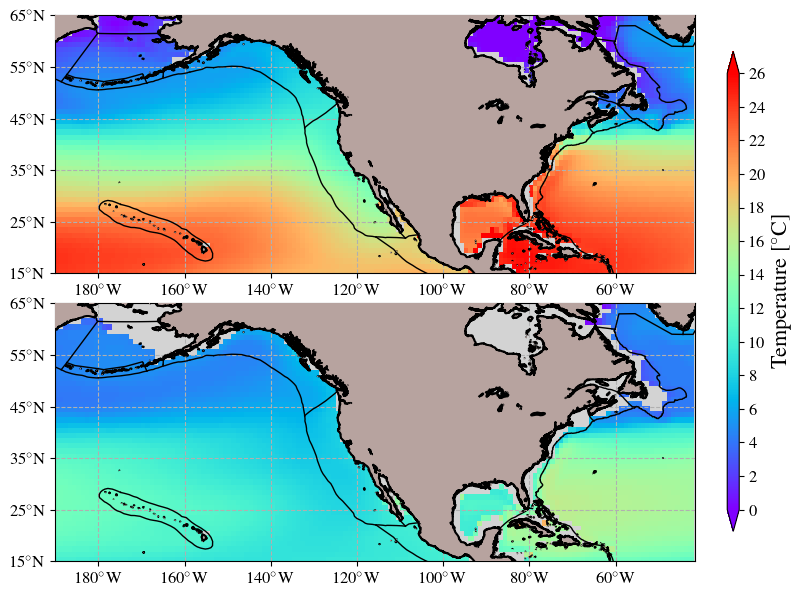

In [9]:
fig = plt.figure(figsize=[8, 6])
gs = gridspec.GridSpec(2, 1) #,width_ratios=[1,1,1,0.00001])
for vv, layer in [[0,layer1],[1, layer2]]:
    ax = fig.add_axes([0.06,0.05+(1-vv)*0.48,0.8,0.43])
    #ax = fig.add_subplot(gs[vv])
    Phi = ds[f'{var}_{layer}'][:144].mean(axis=0)
#    if layer == '200-600m':
#        Phi = o2_600m[:155].mean(axis=0)
#    elif layer == '0-200m':
#        Phi = o2_200m[:155].mean(axis=0)
    #
    xrr = np.arange(lon_min-10,lon_max+10)
    ax.fill_between(xrr,np.ones(len(xrr))*(lat_min-10),np.ones(len(xrr))*(lat_max+10),color='lightgray')
    for pp in range(len(lon0)):
        ax.plot(lon0[pp],lat0[pp],color='k',linewidth=1.,zorder=19)
    if var == 'FOSI_T':
        dmin = 0; dmax = 26
    elif var == 'FOSI_O2':
        dmin = 20; dmax = 320
    cd = ax.pcolor(lon,lat,Phi,cmap=cm.rainbow,vmin=dmin,vmax=dmax)
    #if vv == 0:
    #    ax.contour(lon,lat,Phi,[15],colors='orchid',linewidths=2.)
    #
    ax.pcolor(lon_e,lat_e,mask_bathy,shading='nearest',cmap=cm.terrain_r,vmin=.5,vmax=4,zorder=20)
    ax.contour(lon_e,lat_e,depth_e,[0],colors='k',lw=.15,zorder=21)
    ax.set_xlim(lon_min,lon_max)
    ax.set_ylim(lat_min,lat_max)
    ax.set_xticks(np.arange(-180, -40, 20))
    ax.set_yticks(np.arange(15, 66, 10))
    print(np.nanmin(Phi),np.nanmax(Phi))
    #
    xtl = []
    for ii in np.arange(-180, -40, 20):
        if ii < -180:
            ii = ii + 360
            ff = 'E'
        elif ii >= -180:
            ff = 'W'
        elif np.abs(ii-0)<1e-5:
            ff = ''
        xtl.append('%d$^\circ$%s' % (abs(ii),ff))
    ytl = []
    for jj in np.arange(15, 66, 10):
        if jj < 0:
            ff = 'S'
        elif jj > 0:
            ff = 'N'
        elif np.abs(jj-0)<1e-5:
            ff = ''
        ytl.append('%d$^\circ$%s' % (abs(jj),ff))
    #
    ax.set_xticklabels(xtl,fontsize=12,fontweight='bold',rotation=0)
    ax.set_yticklabels(ytl,fontsize=12,fontweight='bold',rotation=0)
    #
    ax.grid(linestyle='dashed',zorder=11)
    #ax.text(-140,62,var,fontsize=14,fontweight='bold')
# colorbar
cbaxes = fig.add_axes([0.90, 0.1, 0.015, 0.8])
cb = plt.colorbar(cd,orientation="vertical",extend='both',cax=cbaxes,ticks=np.arange(0,27,2))
cb.ax.tick_params(labelsize=12)
cb.set_label(label='Temperature [%s]'% (unit[vv]),fontsize=16,fontweight='bold')
#
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/{var}_{layer1}_{layer2}_vertical_mean_time_mean_195401-201712.png'
plt.savefig(outfile,dpi=400)
plt.show()